In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('ggplot')
%matplotlib inline

In [38]:
#read data
datalist =[]
for i in range(6):
    url="https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2022-0"+str(i+1)+".parquet"
    c=pd.read_parquet(url)
    datalist.append(c)
data = pd.concat(datalist)

In [39]:
print(data.columns)
print(data.shape)

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'airport_fee'],
      dtype='object')
(19817583, 19)


In [40]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [41]:
print(data["tpep_pickup_datetime"].max())
print(data["tpep_pickup_datetime"].min())
print(data["tpep_dropoff_datetime"].max())
print(data["tpep_dropoff_datetime"].min())

2023-04-18 14:30:05
2001-08-23 05:34:45
2023-04-18 23:30:39
2001-08-23 05:57:11


In [42]:
data = data[data.tpep_pickup_datetime < '20220701']
data = data[data.tpep_pickup_datetime > '20211231']

In [43]:
print(data["tpep_pickup_datetime"].max())
print(data["tpep_pickup_datetime"].min())
print(data["tpep_dropoff_datetime"].max())
print(data["tpep_dropoff_datetime"].min())

2022-06-30 23:59:59
2021-12-31 20:28:31
2022-07-02 02:00:27
2021-12-31 20:33:09


In [44]:
data["duration"] = (data["tpep_dropoff_datetime"] - data["tpep_pickup_datetime"])/ np.timedelta64(1, 'm')

In [45]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0,17.816667
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0,8.400000
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0,8.966667
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0,10.033333
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0,37.533333


In [46]:
data.size

396341180

In [47]:
data = data.dropna()

In [13]:
data.size

287177370

In [14]:
data_zoon = pd.read_csv("https://d37ci6vzurychx.cloudfront.net/misc/taxi+_zone_lookup.csv")
data_zoon.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [15]:
zone_dict = dict(zip(data_zoon.LocationID, data_zoon.Zone))
borough_dict = dict(zip(data_zoon.LocationID, data_zoon.Borough))

In [16]:
data['pu_zone'] = data.PULocationID.map(zone_dict)
data['pu_borough'] = data.PULocationID.map(borough_dict)
data['do_zone'] = data.DOLocationID.map(zone_dict)
data['do_borough'] = data.DOLocationID.map(borough_dict)

C:\Users\shuka\AppData\Local\Temp\ipykernel_5256\2850631663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pu_zone'] = data.PULocationID.map(zone_dict)
C:\Users\shuka\AppData\Local\Temp\ipykernel_5256\2850631663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['pu_borough'] = data.PULocationID.map(borough_dict)
C:\Users\shuka\AppData\Local\Temp\ipykernel_5256\2850631663.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

<AxesSubplot:>

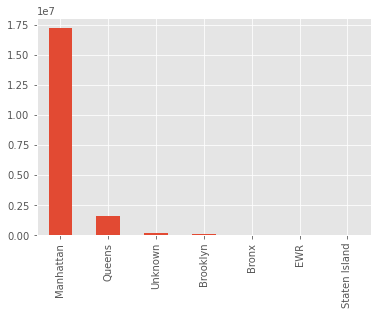

In [17]:
data['pu_borough'].value_counts().plot(kind='bar')

<AxesSubplot:>

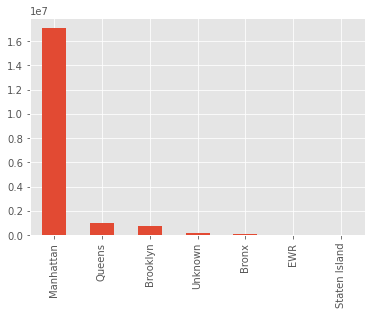

In [18]:
data['do_borough'].value_counts().plot(kind='bar')

<AxesSubplot:>

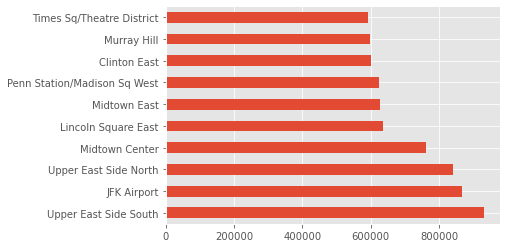

In [19]:
data['pu_zone'].value_counts()[:10].plot(kind='barh')

<AxesSubplot:>

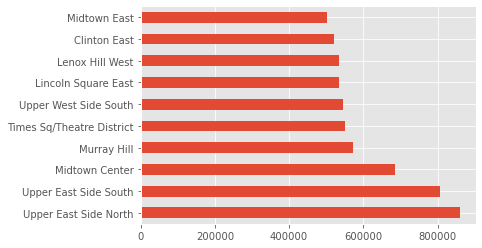

In [20]:
data['do_zone'].value_counts()[:10].plot(kind='barh')

In [93]:
data.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,duration
count,1.914516e+07,1.914516e+07,1.914516e+07,1.914516e+07,1.914516e+07,1.914516e+07,1.914516e+07,1.914516e+07,1.914516e+07,1.914516e+07,1.914516e+07,1.914516e+07,1.914516e+07,1.914516e+07,1.914516e+07,1.914516e+07,1.914516e+07
mean,1.701146e+00,1.396739e+00,3.385810e+00,1.406453e+00,1.650287e+02,1.631831e+02,1.224740e+00,1.403308e+01,1.051895e+00,4.899948e-01,2.627932e+00,4.918875e-01,2.964044e-01,2.066681e+01,2.291229e+00,8.946139e-02,1.668648e+01
std,4.577557e-01,9.723423e-01,5.118127e+01,5.723373e+00,6.512086e+01,7.020972e+01,4.589775e-01,1.300658e+02,1.256098e+00,8.817076e-02,3.177734e+00,1.960186e+00,4.593910e-02,1.304585e+02,7.328814e-01,3.248929e-01,5.261282e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-2.564000e+03,-7.000000e+00,-5.000000e-01,-4.100000e+02,-8.300000e+01,-3.000000e-01,-2.567800e+03,-2.500000e+00,-1.250000e+00,-7.175993e+04
25%,1.000000e+00,1.000000e+00,1.100000e+00,1.000000e+00,1.320000e+02,1.130000e+02,1.000000e+00,7.000000e+00,0.000000e+00,5.000000e-01,9.300000e-01,0.000000e+00,3.000000e-01,1.180000e+01,2.500000e+00,0.000000e+00,7.133333e+00
50%,2.000000e+00,1.000000e+00,1.830000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,1.000000e+01,5.000000e-01,5.000000e-01,2.070000e+00,0.000000e+00,3.000000e-01,1.536000e+01,2.500000e+00,0.000000e+00,1.168333e+01
75%,2.000000e+00,1.000000e+00,3.380000e+00,1.000000e+00,2.340000e+02,2.340000e+02,1.000000e+00,1.550000e+01,2.500000e+00,5.000000e-01,3.240000e+00,0.000000e+00,3.000000e-01,2.180000e+01,2.500000e+00,0.000000e+00,1.881667e+01
max,2.000000e+00,9.000000e+00,1.843408e+05,9.900000e+01,2.650000e+02,2.650000e+02,5.000000e+00,4.010923e+05,3.350000e+01,1.710000e+01,1.400160e+03,9.118700e+02,3.000000e-01,4.010956e+05,2.750000e+00,1.250000e+00,8.513183e+03


In [22]:
data.passenger_count.value_counts()

1.0    14204245
2.0     2864126
3.0      745780
0.0      403221
5.0      366017
4.0      315029
6.0      246538
7.0         105
8.0          78
9.0          19
Name: passenger_count, dtype: int64

In [104]:
data_new = data[["duration","passenger_count","trip_distance","extra","mta_tax",'tip_amount', 'tolls_amount', 'improvement_surcharge',
        'congestion_surcharge', 'airport_fee','total_amount']]

In [105]:
def remove_outliers(df,columns,n_std):
    for col in columns:
        print('Working on column: {}'.format(col))
        
        mean = df[col].mean()
        sd = df[col].std()
        
        df = df[(df[col] <= mean+(n_std*sd))]
        
    return df

In [106]:
data_new = remove_outliers(data_new,["duration","passenger_count","trip_distance","extra","mta_tax",'tip_amount', 'tolls_amount', 'improvement_surcharge',
        'congestion_surcharge', 'airport_fee','total_amount'],3)

Working on column: duration
Working on column: passenger_count
Working on column: trip_distance
Working on column: extra
Working on column: mta_tax
Working on column: tip_amount
Working on column: tolls_amount
Working on column: improvement_surcharge
Working on column: congestion_surcharge
Working on column: airport_fee
Working on column: total_amount


In [107]:
data_new.describe()

,duration,passenger_count,trip_distance,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,airport_fee,total_amount
count,1.656071e+07,1.656071e+07,1.656071e+07,1.656071e+07,1.656071e+07,1.656071e+07,1.656071e+07,1.656071e+07,1.656071e+07,1.656071e+07,1.656071e+07
mean,1.257976e+01,1.255661e+00,2.232320e+00,1.071828e+00,4.915215e-01,2.080522e+00,3.601646e-04,2.959350e-01,2.378477e+00,-7.881607e-04,1.631688e+01
std,1.956574e+01,6.419580e-01,2.037588e+00,1.214989e+00,8.585708e-02,1.705412e+00,1.584430e-01,4.889939e-02,5.966175e-01,3.137801e-02,8.617303e+00
min,-7.175993e+04,0.000000e+00,0.000000e+00,-7.000000e+00,-5.000000e-01,-4.100000e+02,-8.300000e+01,-3.000000e-01,-2.500000e+00,-1.250000e+00,-2.567800e+03
25%,6.766667e+00,1.000000e+00,1.030000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,3.000000e-01,2.500000e+00,0.000000e+00,1.175000e+01
50%,1.075000e+01,1.000000e+00,1.680000e+00,5.000000e-01,5.000000e-01,2.000000e+00,0.000000e+00,3.000000e-01,2.500000e+00,0.000000e+00,1.475000e+01
75%,1.636667e+01,1.000000e+00,2.700000e+00,2.500000e+00,5.000000e-01,2.960000e+00,0.000000e+00,3.000000e-01,2.500000e+00,0.000000e+00,1.903000e+01
max,1.743333e+02,4.000000e+00,1.551000e+02,4.800000e+00,5.000000e-01,1.210000e+01,5.250000e+00,3.000000e-01,2.750000e+00,0.000000e+00,4.303000e+02


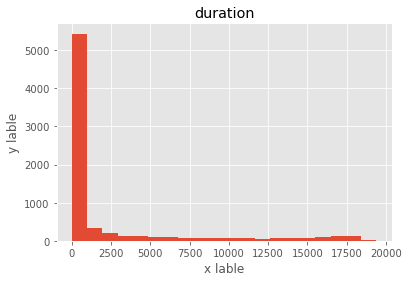

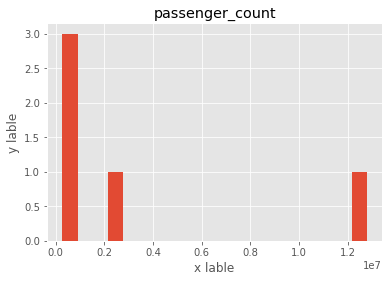

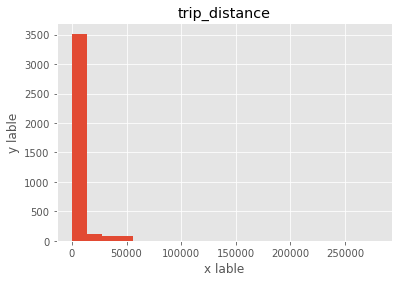

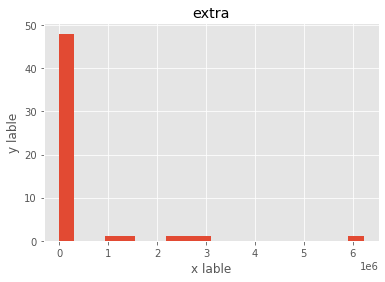

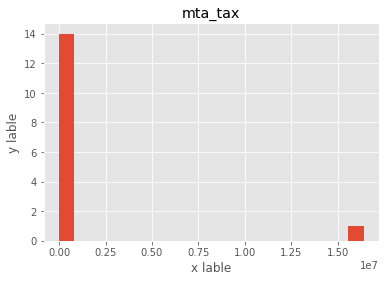

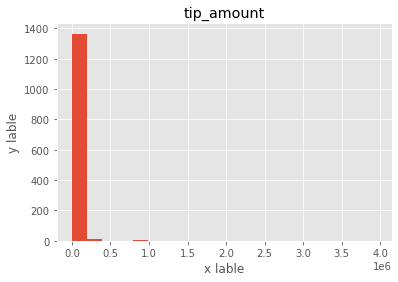

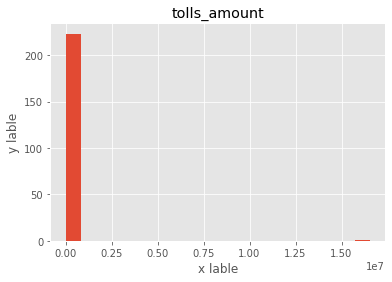

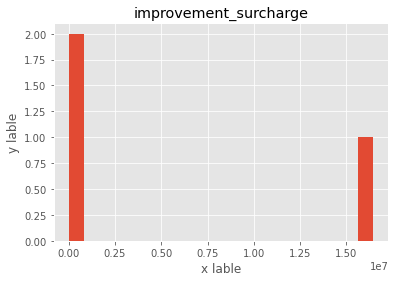

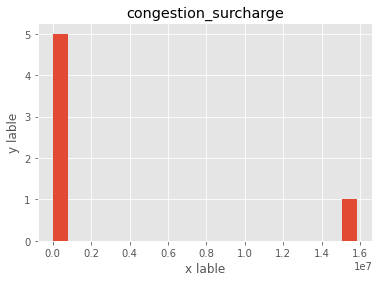

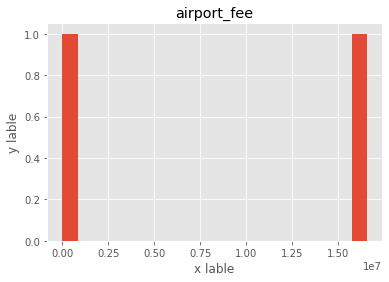

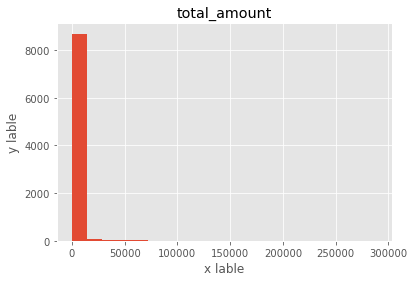

In [108]:
for i in ["duration","passenger_count","trip_distance","extra","mta_tax",'tip_amount', 'tolls_amount', 'improvement_surcharge',
        'congestion_surcharge', 'airport_fee','total_amount']:
    data_new[i].value_counts().hist(bins = 20)
    plt.title(i)
    plt.xlabel('x lable')
    plt.ylabel('y lable')
    plt.show()

<AxesSubplot:>

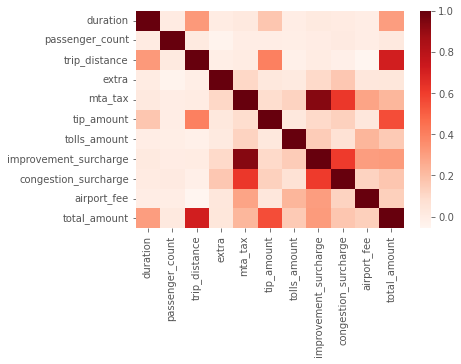

In [109]:
import seaborn as sns
%matplotlib inline


# calculate the correlation matrix
corr = data_new.corr()
# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
             cmap=plt.cm.Reds)

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from numpy import mean
from numpy import absolute
from numpy import sqrt

In [110]:
X = data_new.drop('total_amount', axis=1)
y = data_new['total_amount']

In [111]:
X.dtypes

duration                 float64
passenger_count          float64
trip_distance            float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
congestion_surcharge     float64
airport_fee              float64
dtype: object

In [112]:
X_tr =X.iloc[:-10000,:]
Y_tr =y.iloc[:-10000]
X_te =X.iloc[-10000:,:]
Y_te =y.iloc[-10000:]

In [116]:
print(X_tr.shape)
print(Y_tr.shape)
print(X_te.shape)
print(Y_te.shape)

(16550708, 10)
(16550708,)
(10000, 10)
(10000,)


In [117]:


cv = KFold(n_splits=10, random_state=1, shuffle=True)


model = LinearRegression()

scores = cross_val_score(model,X_tr , Y_tr, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

In [118]:
sqrt(mean(absolute(scores)))

1.292709250376609

In [119]:
model.fit(X_tr,Y_tr)

LinearRegression()

In [122]:
y_p=model.predict(X_te)

In [125]:
mean_squared_error(y_p,Y_te)

15.48136132222917

In [126]:
from sklearn.feature_selection import RFE

In [136]:
from sklearn.pipeline import Pipeline
rfe = RFE(estimator=LinearRegression(), n_features_to_select=7)
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
pipeline.fit(X_tr, Y_tr)

Pipeline(steps=[('s',
                 RFE(estimator=LinearRegression(), n_features_to_select=7)),
                ('m', LinearRegression())])

In [137]:
y_p1=pipeline.predict(X_te)
mean_squared_error(y_p1,Y_te)

15.828882824832544

In [140]:
rfe.support_

array([False, False,  True, False,  True,  True,  True,  True,  True,
        True])

In [141]:
rfe.ranking_

array([4, 2, 1, 3, 1, 1, 1, 1, 1, 1])

In [142]:
["duration","passenger_count","trip_distance","extra","mta_tax",'tip_amount', 'tolls_amount', 'improvement_surcharge',
        'congestion_surcharge', 'airport_fee','total_amount']

['duration',
 'passenger_count',
 'trip_distance',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'congestion_surcharge',
 'airport_fee',
 'total_amount']